# <span style='color:Blue'>[ 중고 휴대폰 / 태블릿 거래 트랜드 분석 ]</span>
## 2조 임재원

In [108]:
# 모듈 로딩
import numpy as np
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import platform
from IPython.display import Image

# <span style='color:Blue'>Web 크롤링(중고 휴대폰)</span>
- 2020.01 ~ 2022.07까지 월별 휴대폰 판매 게시글 title 크롤링
- 월별 10개 page => 총 310개 page => 4650개의 게시글

In [48]:
# 드라이버 경로 불러오기
driver = webdriver.Chrome(r'G:\내 드라이브\빅데이터 분석가 양성과정\기타\chromedriver_win32\chromedriver')

# 로그인 정보
login_url = 'https://nid.naver.com/nidlogin.login'
naver_id = "kry1126"
naver_pw = "19xj1uxX!"

# 드라이버 실행 후 로그인
driver.get(login_url)
driver.implicitly_wait(2)

# execute_script 함수 사용하여 자바스크립트로 id,pw 넘겨주기
driver.execute_script("document.getElementsByName('id')[0].value=\'" + naver_id + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + naver_pw + "\'")

# 로그인 버튼 클릭하기
driver.find_element_by_id('log.login').click()
time.sleep(1)

# 게시글 제목 담을 리스트 생성
article_list_20 = []
article_list_21 = []
article_list_22 = []

# 특정 날짜 휴대폰 판매 페이지 1~10까지 크롤링 => 2020년 1월 ~ 2022년 7월
for year in range(20, 23):
    for month in range(1,13):
        for i in range(10):
            if month < 10:
                month2 = '0' + str(month)
            # 크롤링 진행하려는 카페 주소(중고나라)
            cafe_url = f'https://cafe.naver.com/joonggonara?iframe_url=/ArticleSearchList.nhn%3Fsearch.clubid=10050146%26search.menuid=339%26search.media=0%26search.searchdate=20{year}-{month2}-0120{year}-{month2}-01%26search.defaultValue=1%26userDisplay=15%26search.onSale=1%26search.option=3%26search.sortBy=date%26search.searchBy=0%26search.searchBlockYn=0%26search.query=%C6%CB%B4%CF%B4%D9%26search.viewtype=title%26search.page={i}'
            driver.get(cafe_url)
            print(f'{year}년 {month2}월 분석중...')
            # iframe으로 접근
            driver.switch_to.frame('cafe_main')
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            # soup = soup.find_all(class_='article-board m-tcol-c')[1]

            # 네이버 카페 구조 확인후 게시글 내용만 가저오기
            datas = soup.find_all(class_='td_article')
            dates = soup.find_all(class_='td_date')

            for data in datas:
                article_title = data.find(class_='article')
                link = article_title.get('href')
                article_title = article_title.get_text().strip()
                if year == 20:
                    article_list_20.append(article_title)
                elif year == 21:
                    article_list_21.append(article_title)
                else:
                    article_list_22.append(article_title)

driver.close()
print('종료')

20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석

In [49]:
# 년도별로 뽑아온 게시글 리스트 DataFrame으로 변환 후 저장
pd.DataFrame({'2020년': article_list_20}).to_csv('used_phone20.csv', encoding='utf-8-sig')
pd.DataFrame({'2021년': article_list_21}).to_csv('used_phone21.csv', encoding='utf-8-sig')
pd.DataFrame({'2022년': article_list_22}).to_csv('used_phone22.csv', encoding='utf-8-sig')

In [79]:
# 형태소 분석 및 키워드 추출
for i in range(20, 23):
    # open으로 csv파일을 열고 read()를 이용하여 읽는다.
    used_phoneDF = open(f'used_phone{i}.csv', encoding='utf-8-sig').read()
    okt = Okt() # Open Korean Text 객체 생성
    article_list_20 = pd.read_csv('used_phone20.csv')['2020년'].to_list()
    article_list_21 = pd.read_csv('used_phone21.csv')['2021년'].to_list()
    article_list_22 = pd.read_csv('used_phone22.csv')['2022년'].to_list()
    # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
    sentences_tag = []
    noun_adj_list = []
    if i == 20:
        for data in article_list_20:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    noun_adj_list.append(word)
        counts = Counter(noun_adj_list)
        tags20 = counts.most_common(20)
        print(tags20)
        print()
    if i == 21:
        for data in article_list_21:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    noun_adj_list.append(word)
        counts = Counter(noun_adj_list)
        tags21 = counts.most_common(20)
        print(tags21)
        print()
    if i == 22:
        for data in article_list_22:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    noun_adj_list.append(word)
        counts = Counter(noun_adj_list)
        tags22 = counts.most_common(20)
        print(tags22)
        print()
tags20 = dict(tags20)
tags21 = dict(tags21)
tags22 = dict(tags22)

[('갤럭시', 476), ('기', 468), ('급', 350), ('아이폰', 308), ('공기', 293), ('데이터', 253), ('블랙', 210), ('삼성', 185), ('노트', 184), ('골드', 119), ('특', 109), ('플러스', 104), ('폰', 101), ('블루', 85), ('판매', 67), ('엘지', 61), ('실버', 60), ('상품', 56), ('가능', 56), ('부산', 51)]

[('갤럭시', 834), ('용량', 715), ('색상', 509), ('단말기', 489), ('급', 338), ('노트', 308), ('블랙', 291), ('아이폰', 254), ('플러스', 219), ('화이트', 201), ('무잔', 197), ('완전', 191), ('울트라', 142), ('아우라', 112), ('기', 111), ('폰', 92), ('상품', 91), ('그레이', 88), ('블루', 86), ('글', 81)]

[('갤럭시', 596), ('급', 291), ('최저', 226), ('판매', 221), ('노트', 186), ('폰', 181), ('블랙', 180), ('용량', 164), ('무잔', 156), ('단말기', 130), ('색상', 125), ('아이폰', 112), ('중고', 106), ('정상', 104), ('플러스', 94), ('공기', 83), ('울트라', 80), ('화이트', 77), ('전국', 66), ('해지', 59)]



# <span style='color:Blue'>WordCloud 생성 후 눈에띄는 키워드 추출</span>

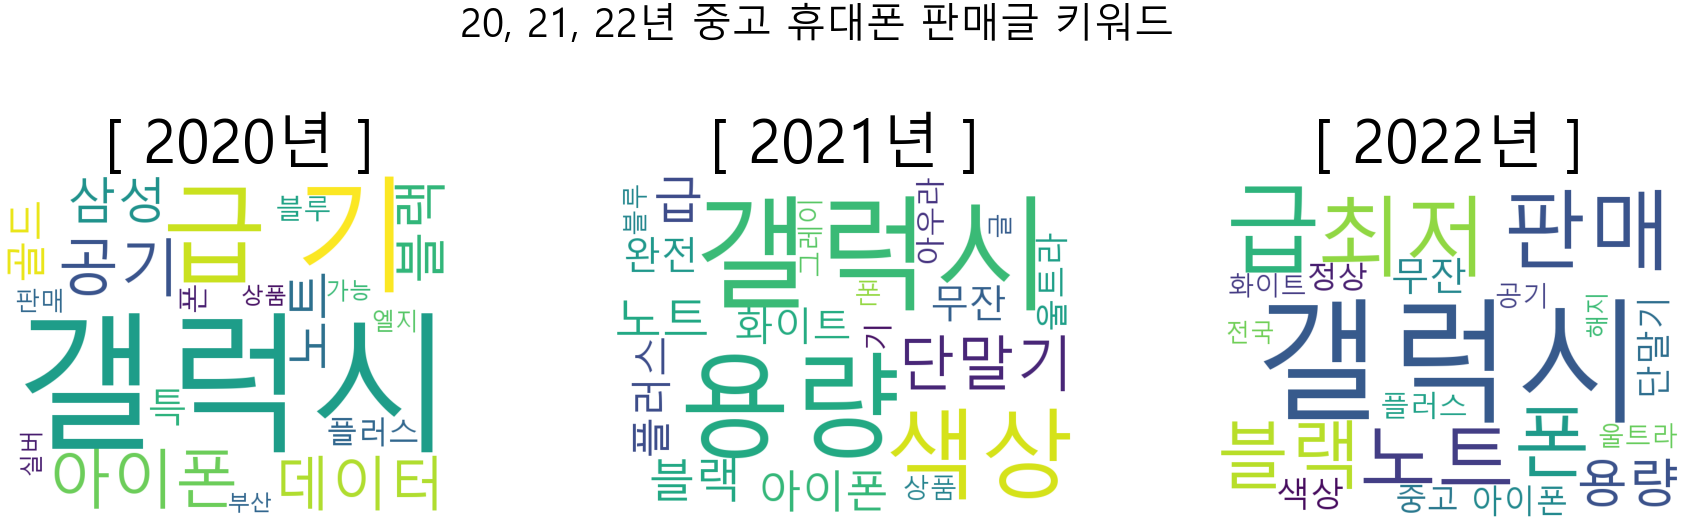

In [102]:
# wordCloud생성
# 한글꺠지는 문제 해결하기위해 font_path 지정
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':  # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('20, 21, 22년 중고 휴대폰 판매글 키워드', fontsize=40)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(1,3,1)
wc = WordCloud(font_path=path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags20))
plt.axis('off')
plt.title('[ 2020년 ]', size=60)
plt.imshow(cloud)

plt.subplot(1,3,2)
cloud = wc.generate_from_frequencies(dict(tags21))
plt.axis('off')
plt.title('[ 2021년 ]', size=60)
plt.imshow(cloud)

plt.subplot(1,3,3)
cloud = wc.generate_from_frequencies(dict(tags22))
plt.axis('off')
plt.title('[ 2022년 ]', size=60)
plt.imshow(cloud)

plt.show()

# <span style='color:Blue'>연도별 점유율과 중고 거래 노출량의 상관관계 분석</span>

In [80]:
# 연도별 점유율 데이터 로딩
shareDF = pd.read_csv('국내 스마트폰 점유율.csv', index_col=0)
share20 = shareDF.T.iloc[0:4].mean()  # 2020년 점유율
share21 = shareDF.T.iloc[4:8].mean()  # 2021년 점유율
share22 = shareDF.T.iloc[8]           # 2022년 점유율
share_gal = [share20[0], share21[0], share22[0]]
share_i = [share20[1], share21[1], share22[1]]

In [81]:
# 연도별 중고거래 노출량
used_gal = [tags20['갤럭시'], tags21['갤럭시'], tags22['갤럭시']]
used_i = [tags20['아이폰'], tags21['아이폰'], tags22['아이폰']]

rate_gal_list = []
rate_i_list = []
for i in range(len(used_i)):
    rate_gal_list.append(used_gal[i] / share_gal[i])
    if i == 2:
        rate_i_list.append(used_i[1] / share_i[2])
    else:
        rate_i_list.append(used_i[i] / share_i[0])

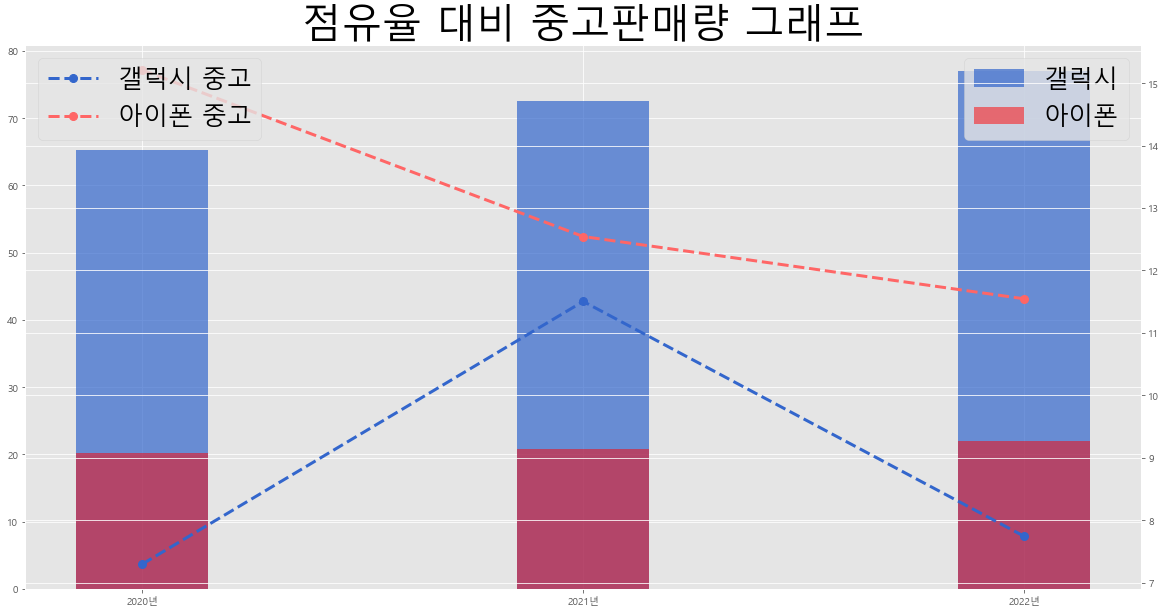

In [84]:
# 점유율, 중고거래량 그래프 생성
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
plt.title('점유율 대비 중고판매량 그래프', size=40)
colors = ['#3366CC','#333333','#FF6666']
x = ['2020년', '2021년', '2022년']
y = [10,20,30,40,50,60,70,80,90,100]
# plt.plot(x,share_gal, color=colors[0], label='갤럭시', marker='s', markersize=8, linestyle='--', linewidth=1.0)
ax1.bar(x,share_gal, color=colors[0], alpha=0.7, label='갤럭시', width=0.3)
# plt.plot(x,share_i, color=colors[1], label='아이폰', marker='o', markersize=8, linestyle='--', linewidth=1.0)
ax1.bar(x,share_i, color='r', alpha=0.5, label='아이폰', width=0.3)
ax2.plot(x,rate_gal_list, color=colors[0], label='갤럭시 중고', marker='o', markersize=8, linestyle='--', linewidth=3.0)
ax2.plot(x,rate_i_list, color=colors[2], label='아이폰 중고', marker='o', markersize=8, linestyle='--', linewidth=3.0)
# plt.xticks(ticks=x, labels=x, rotation=0, size=15)
# plt.yticks(ticks=y, labels=y, rotation=0, size=15)
ax1.legend(fontsize=25, loc=1)
ax2.legend(fontsize=25, loc=2)
plt.style.use('ggplot')
plt.show()

## 아이폰은 점유율이 낮음에도 불구하고 갤럭시보다 중고 판매 비율이 높다
### - 이는 아이폰의 중고가 방어가 잘 되서, 중고거래가 활발하기 때문이라 생각함

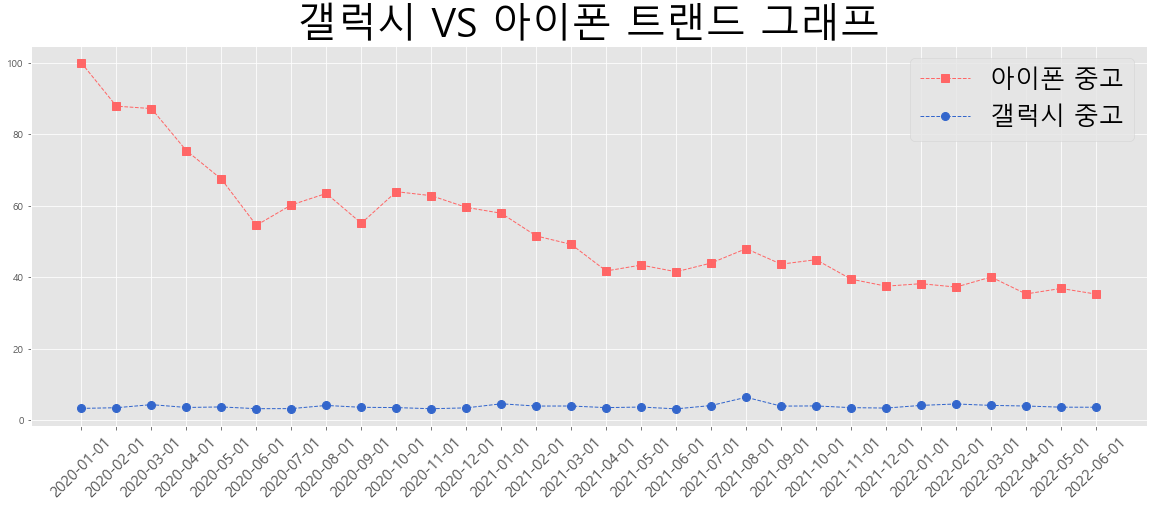

In [85]:
# 네이버 트렌드 데이터 가져오기
trendDF = pd.read_csv('datalab.csv', header=6).set_index('날짜')

# 데이터 바탕으로 그래프 그리기
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
plt.figure(figsize=(20,7))
plt.title('갤럭시 VS 아이폰 트랜드 그래프', size=40)
colors = ['#3366CC','#333333','#FF6666']
plt.plot(trendDF.index,trendDF['아이폰 중고'], color=colors[2], label='아이폰 중고', marker='s', markersize=8, linestyle='--', linewidth=1.0)
plt.plot(trendDF.index,trendDF['갤럭시 중고'], color=colors[0], label='갤럭시 중고', marker='o', markersize=8, linestyle='--', linewidth=1.0)
plt.xticks(ticks=trendDF.index, labels=trendDF.index, rotation=45, size=15)
plt.legend(fontsize=25)
plt.style.use('ggplot')
plt.show()

## 실제로 네이버 트렌드 분석을 해보았을때,
## 갤럭시 중고의 검색량은 아이폰 중고의 검색량보다 훨씬 떨어지는 경향을 볼 수 있었음

# <span style='color:Blue'>Web 크롤링(중고 태블릿)</span>
- 2020.01 ~ 2022.07까지 월별 태블릿 판매 게시글 title 크롤링
- 월별 10개 page => 총 310개 page => 4650개의 게시글

In [104]:
# 드라이버 경로 불러오기
driver = webdriver.Chrome(r'G:\내 드라이브\빅데이터 분석가 양성과정\기타\chromedriver_win32\chromedriver')

# 로그인 정보
login_url = 'https://nid.naver.com/nidlogin.login'
naver_id = "kry1126"
naver_pw = "19xj1uxX!"

# 드라이버 실행 후 로그인
driver.get(login_url)
driver.implicitly_wait(2)

# execute_script 함수 사용하여 자바스크립트로 id,pw 넘겨주기
driver.execute_script("document.getElementsByName('id')[0].value=\'" + naver_id + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + naver_pw + "\'")

# 로그인 버튼 클릭하기
driver.find_element_by_id('log.login').click()
time.sleep(1)

# 게시글 제목 담을 리스트 생성
article_list_20_tab = []
article_list_21_tab = []
article_list_22_tab = []

# 특정 날짜 휴대폰 판매 페이지 1~10까지 크롤링 => 2020년 1월 ~ 2022년 7월
for year in range(20, 23):
    for month in range(1,13):
        for i in range(10):
            if month < 10:
                month2 = '0' + str(month)
            # 크롤링 진행하려는 카페 주소(중고나라)
            cafe_url = f'https://cafe.naver.com/joonggonara?iframe_url=/ArticleSearchList.nhn%3Fsearch.clubid=10050146%26search.menuid=749%26search.media=0%26search.searchdate=20{year}-{month2}-0120{year}-{month2}-28%26search.defaultValue=1%26userDisplay=15%26search.onSale=1%26search.option=3%26search.sortBy=date%26search.searchBy=0%26search.searchBlockYn=0%26search.query=%C6%CB%B4%CF%B4%D9%26search.viewtype=title%26search.page={i}'
            driver.get(cafe_url)
            print(f'{year}년 {month2}월 분석중...')
            # iframe으로 접근
            driver.switch_to.frame('cafe_main')
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            # soup = soup.find_all(class_='article-board m-tcol-c')[1]

            # 네이버 카페 구조 확인후 게시글 내용만 가저오기
            datas = soup.find_all(class_='td_article')
            dates = soup.find_all(class_='td_date')

            for data in datas:
                article_title = data.find(class_='article')
                link = article_title.get('href')
                article_title = article_title.get_text().strip()
                if year == 20:
                    article_list_20_tab.append(article_title)
                elif year == 21:
                    article_list_21_tab.append(article_title)
                else:
                    article_list_22_tab.append(article_title)

driver.close()
print('종료')

20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 01월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 02월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 03월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 04월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 05월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 06월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석중...
20년 07월 분석

In [105]:
# 년도별로 뽑아온 게시글 리스트 DataFrame으로 변환 후 저장
pd.DataFrame({'2020년': article_list_20_tab}).to_csv('used_tab20.csv', encoding='utf-8-sig')
pd.DataFrame({'2021년': article_list_21_tab}).to_csv('used_tab21.csv', encoding='utf-8-sig')
pd.DataFrame({'2022년': article_list_22_tab}).to_csv('used_tab22.csv', encoding='utf-8-sig')

for i in range(20, 23):
    # open으로 csv파일을 열고 read()를 이용하여 읽는다.
    used_tabDF = open(f'used_tab{i}.csv', encoding='utf-8-sig').read()
    okt = Okt() # Open Korean Text 객체 생성
    article_list_20 = pd.read_csv('used_tab20.csv')['2020년'].to_list()
    article_list_21 = pd.read_csv('used_tab21.csv')['2021년'].to_list()
    article_list_22 = pd.read_csv('used_tab22.csv')['2022년'].to_list()

    # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
    sentences_tag = []
    noun_adj_list = []
    if i == 20:
        for data in article_list_20:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    noun_adj_list.append(word)
        counts = Counter(noun_adj_list)
        tags20 = counts.most_common(20)
        print(tags20)
        print()
    if i == 21:
        for data in article_list_21:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    noun_adj_list.append(word)
        counts = Counter(noun_adj_list)
        tags21 = counts.most_common(20)
        print(tags21)
        print()
    if i == 22:
        for data in article_list_22:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    noun_adj_list.append(word)
        counts = Counter(noun_adj_list)
        tags22 = counts.most_common(20)
        print(tags22)
        print()
tags20 = dict(tags20)
tags21 = dict(tags21)
tags22 = dict(tags22)

[('아이패드', 833), ('세대', 587), ('프로', 409), ('기', 369), ('갤럭시탭', 293), ('갤럭시', 217), ('셀룰러', 210), ('애플', 193), ('와이파이', 182), ('펜슬', 172), ('미개', 170), ('인치', 170), ('봉', 160), ('보드', 158), ('그레이', 149), ('키', 149), ('급', 143), ('탭', 140), ('미니', 124), ('판매', 109)]

[('아이패드', 1011), ('세대', 815), ('프로', 508), ('갤럭시탭', 303), ('기', 299), ('애플', 297), ('펜슬', 249), ('셀룰러', 245), ('인치', 244), ('에어', 235), ('미개', 188), ('봉', 182), ('와이파이', 149), ('보드', 145), ('그레이', 139), ('갤럭시', 124), ('키', 123), ('실버', 119), ('스페이스', 116), ('스그', 111)]

[('아이패드', 370), ('갤럭시탭', 337), ('세대', 292), ('미개', 221), ('봉', 221), ('프로', 169), ('기', 152), ('그레이', 129), ('와이파이', 109), ('갤럭시', 105), ('모델', 100), ('상품', 94), ('인치', 92), ('탭', 87), ('에어', 86), ('애플', 85), ('펜슬', 80), ('셀룰러', 74), ('블랙', 73), ('급', 67)]



# <span style='color:Blue'>WordCloud 생성 후 눈에띄는 키워드 추출(2)</span>

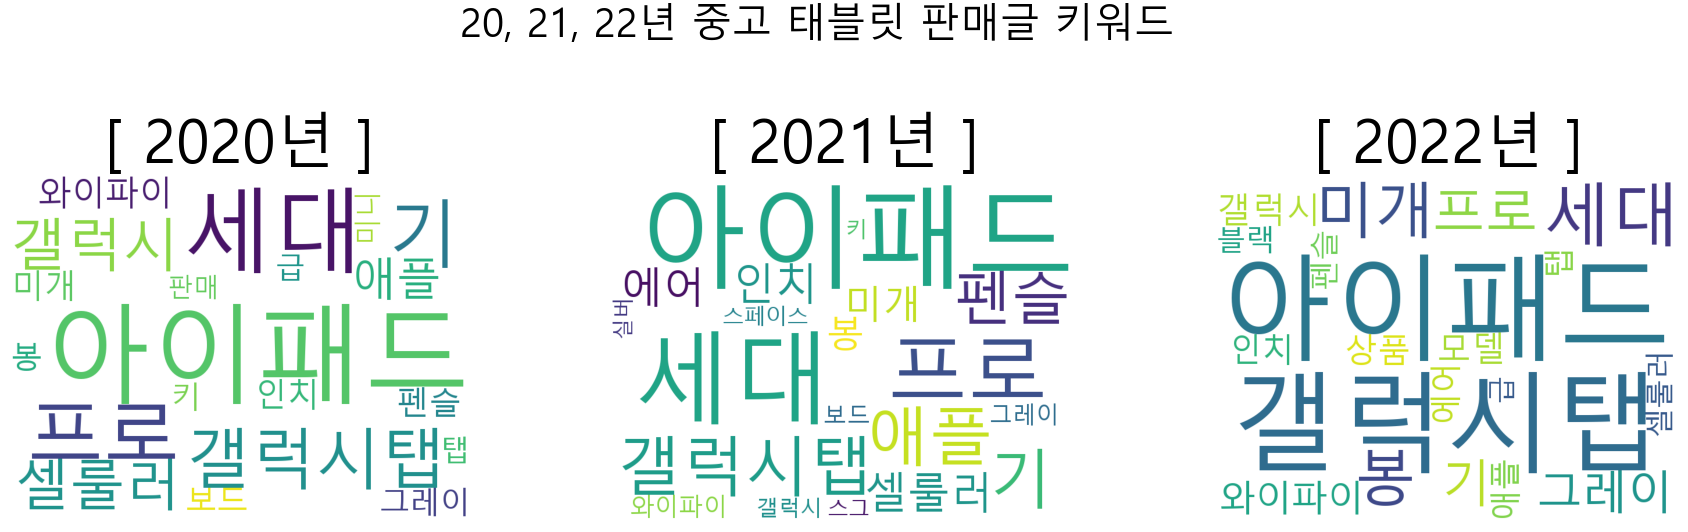

In [106]:
# wordCloud생성
# 한글꺠지는 문제 해결하기위해 font_path 지정
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':  # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('20, 21, 22년 중고 태블릿 판매글 키워드', fontsize=40)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(1,3,1)
wc = WordCloud(font_path=path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags20))
plt.axis('off')
plt.title('[ 2020년 ]', size=60)
plt.imshow(cloud)

plt.subplot(1,3,2)
cloud = wc.generate_from_frequencies(dict(tags21))
plt.axis('off')
plt.title('[ 2021년 ]', size=60)
plt.imshow(cloud)

plt.subplot(1,3,3)
cloud = wc.generate_from_frequencies(dict(tags22))
plt.axis('off')
plt.title('[ 2022년 ]', size=60)
plt.imshow(cloud)

;plt.show()

# <span style='color:Blue'>연도별 점유율과 중고 거래 노출량의 상관관계 분석(2)</span>

In [58]:
# 연도별 점유율 데이터 로딩
shareDF = pd.read_csv('국내 태블릿 점유율.csv', index_col=0, header=1)
share_gal = [shareDF['2020'].iloc[1], shareDF['2021'].iloc[1], shareDF['2022'].iloc[1]]
share_i = [shareDF['2020'].iloc[0], shareDF['2021'].iloc[0], shareDF['2022'].iloc[0]]

# 연도별 중고거래 노출량
used_gal_tab = [tags20['갤럭시']+tags20['갤럭시탭'], tags21['갤럭시']+tags21['갤럭시탭'], tags22['갤럭시']+tags22['갤럭시탭']]
used_i_tab = [tags20['아이패드'], tags21['아이패드'], tags22['아이패드']]

rate_gal_list = []
rate_i_list = []
for i in range(len(used_i)):
    rate_gal_list.append(used_gal_tab[i] / share_gal[i])
    rate_i_list.append(used_i_tab[i] / share_i[i])

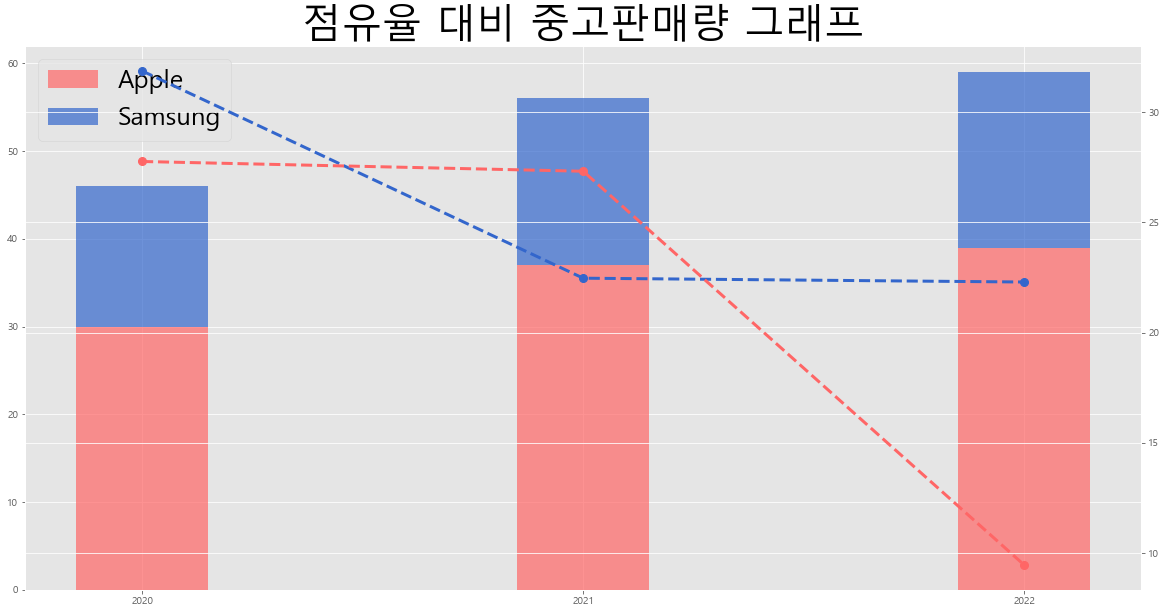

In [67]:
# 데이터 바탕으로 그래프 그리기
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
plt.title('점유율 대비 중고판매량 그래프', size=40)
colors = ['#3366CC','#333333','#FF6666']
x = ['2020년', '2021년', '2022년']
y = [10,20,30,40,50,60,70,80,90,100]
plt.title('점유율 대비 중고판매량 그래프', size=40)
ax1.bar(shareDF.columns,shareDF.loc['Apple'],color=colors[2],label="Apple", width=0.3, alpha=0.7)
ax1.bar(shareDF.columns,shareDF.loc['Samsung'],color=colors[0],bottom=np.array(shareDF.loc['Apple']),label="Samsung",width=0.3, alpha=0.7)
ax2.plot(shareDF.columns,rate_gal_list, color=colors[0], label='갤럭시탭 중고', marker='o', markersize=8, linestyle='--', linewidth=3.0)
ax2.plot(shareDF.columns,rate_i_list, color=colors[2], label='아이패드 중고', marker='o', markersize=8, linestyle='--', linewidth=3.0)
plt.xticks(size = 15)
ax1.legend(fontsize=25)
plt.style.use('ggplot')
plt.show()

# 2022년 갤럭시탭 중고 판매량이 아이패드 중고 판매량을 역전함
- 갤럭시탭이 코로나 19시기 이후 급증한 태블릿 수요에 적절히 대응하면서 아이패드 점유율을 점점 따라잡는 경향을 보임
- 그에 따라 중고 판매량 또한 갤럭시탭이 아이패드를 앞지른 것으로 보인다

# <span style='color:Blue'>[ 결론 ]</span>
## 1) 판매량에 비해 중고 판매율은 아이폰이 높음. 왜?
## => 업데이트 지속 지원 미비, OS최적화 문제

![nn](삼성업데이트미지원.png)

## 2) 그렇다면 중고 시장 점유가 기업에게 이익이 될까?
## => 휴대폰의 특성, 충성도 높은 고객의 확보

# <span style='color:Blue'>자료 출처</span>
- 게시글 키워드 크롤링 => https://cafe.naver.com/joonggonara
- 아이폰, 갤럭시 국내 점유율 => https://nhj12311.tistory.com/359
- 아이패드, 갤럭시탭 국내 점유율 => https://biz.newdaily.co.kr/site/data/html/2022/05/01/2022050100083.html
- 네이버 트랜드 검색량 비교 => https://datalab.naver.com/

# <span style='color:Blue'>[ 2조 최종 결론 : 중고시장 트랜드 분석 ]</span>

## 기존 인식: 중고로 많이 올라온 상품은 부정적
## but 최근 중고거래 시장이 성장하고 있는 추세   => 기업의 입장에서 중고시장의 트렌드 분석은 매우 중요해짐